
# Project Data Mining
---
Base name: Predict students' dropout and academic success <br>
url: https://archive.ics.uci.edu/dataset/697/predict+student+dropout+and+academic+success


## Dependency
Instalação de todas as dependencias do projeto, assim como a importação da base de dados utilizando a biblioteca ucimlrepo e colocando o dataframe dentro de um pandas, para facilitar a manipulação.

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import scipy.stats as stats

In [ ]:
from sklearn import tree
from ucimlrepo import fetch_ucirepo
from matplotlib.lines import Line2D
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import RocCurveDisplay, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, log_loss, confusion_matrix, accuracy_score, classification_report, r2_score, roc_curve, roc_auc_score, auc

In [ ]:
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

In [ ]:
X_dropout = predict_students_dropout_and_academic_success.data.features
y_dropout = predict_students_dropout_and_academic_success.data.targets
main_df = pd.read_csv(predict_students_dropout_and_academic_success.metadata.data_url, sep = ',')

In [ ]:
print(predict_students_dropout_and_academic_success.metadata.data_url)

https://archive.ics.uci.edu/static/public/697/data.csv


## Start

## Tratamento

Aqui vamos fazer toda a etapa de pré-processamento dos dados, onde iremos fazer a verificação se existe dados nulos, remoção de colunas que não são necessarias, transformação de valores categoricos em valores numericos, entre outras técnicas de pré-processamento.

In [ ]:
df = main_df.copy()

Apresentação dos dados contidos em nosso arquivo CSV, que completam 37 colunas.
Cada coluna é preenchida com valores numéricos, seja inteiros ou flutuantes. Notavelmente, não há presença de dados nulos, todas as 4424 entradas estão devidamente preenchidas com seus respectivos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Verificação se existe valores duplicado para cada coluna dentro do arquivo CSV para executar alguma arbodagem necessaria, como por exemplo utilização de algoritmos e tecnicas para fazer injeção nos dados faltantes.

In [ ]:
print("Verificação se existe dados nulos:\n", df.isnull().sum())

Verificação se existe dados nulos:
 Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder          

In [ ]:
print("Numero de dados duplicados: ", df.duplicated().sum())

Numero de dados duplicados:  0


Alteração no nome de colunas importantes para facilitar a tratativa dos itens

---

- Nacionality -> Nacionalidade
- Target -> Status

In [ ]:
df.rename(columns = {'Nacionality':'Nacionalidade', 'Target': 'Status'}, inplace = True)

Alteração dos valores categoricos para numericos

---
- Enrolled -> 0
- Graduate -> 1
- Dropout  -> 2

In [ ]:
df['Status'] = df['Status'].map({'Enrolled' : 0, 'Graduate': 1, 'Dropout': 2})

realiza uma análise de correlação entre a coluna 'Status' e as demais, a fim de identificar quais têm a maior sinergia com ela. Ao utilizar o método 'Spearman', buscamos avaliar se há uma relação monotônica entre as variáveis, o que implica que, conforme uma variável aumenta, a outra também tende a aumentar (ou diminuir).

In [ ]:
spearman_corr = df.corr(method='spearman')['Status'].sort_values(ascending=False)
print(spearman_corr)

Status                                            1.000000
Age at enrollment                                 0.210285
Debtor                                            0.166695
Gender                                            0.131119
Application mode                                  0.123301
Previous qualification                            0.122757
Marital Status                                    0.097270
Mother's qualification                            0.051243
Unemployment rate                                 0.033238
Curricular units 2nd sem (without evaluations)    0.027242
Curricular units 1st sem (without evaluations)    0.022230
Inflation rate                                    0.018713
Course                                            0.010208
Father's qualification                            0.005161
Curricular units 1st sem (credited)              -0.001293
Educational special needs                        -0.002991
Curricular units 2nd sem (credited)              -0.0035

Aplicação da tecnica feature engineering, realiazndo a junção das tabelas para que os preditores possam aumentar significamente a precisão do modelo.


In [ ]:
df['Interacao_UC_1st_2nd_Aprovado'] = df['Curricular units 1st sem (approved)'] * df['Curricular units 2nd sem (approved)']
df['Interacao_UC_1st_2nd_Nota'] = df['Curricular units 1st sem (grade)'] * df['Curricular units 2nd sem (grade)']
df['Interacao_UC_1st_2nd_credited'] = df['Curricular units 1st sem (credited)'] * df['Curricular units 2nd sem (credited)']
df['Interacao_UC_1st_2nd_enrolled'] = df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (enrolled)']
df['Interacao_UC_1st_2nd_evaluations'] = df['Curricular units 1st sem (evaluations)'] * df['Curricular units 1st sem (evaluations)']

In [ ]:
df['Total_UC_Aprovado'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']
df['Total_UC_Credited'] = df['Curricular units 1st sem (credited)'] + df['Curricular units 2nd sem (credited)']
df['Total_UC_Enrolled'] = df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']
df['Total_UC_Evaluations'] = df['Curricular units 1st sem (evaluations)'] + df['Curricular units 2nd sem (evaluations)']
df['Total_UC_Nota'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

In [ ]:
drop_columns = [
    'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)',
    'Curricular units 1st sem (enrolled)','Curricular units 2nd sem (enrolled)',
    'Curricular units 1st sem (evaluations)','Curricular units 2nd sem (evaluations)'
    ]
df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
df.head(5)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionalidade,Mother's qualification,Father's qualification,...,Interacao_UC_1st_2nd_Aprovado,Interacao_UC_1st_2nd_Nota,Interacao_UC_1st_2nd_credited,Interacao_UC_1st_2nd_enrolled,Interacao_UC_1st_2nd_evaluations,Total_UC_Aprovado,Total_UC_Credited,Total_UC_Enrolled,Total_UC_Evaluations,Total_UC_Nota
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0.000000,0,0,0,0,0,0,0,0.000000
1,1,15,1,9254,1,1,160.0,1,1,3,...,36,191.333333,0,36,36,12,0,12,12,13.833333
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0.000000,0,36,0,0,0,12,0,0.000000
3,1,17,2,9773,1,1,122.0,1,38,37,...,30,166.514286,0,36,64,11,0,12,18,12.914286
4,2,39,1,8014,0,1,100.0,1,37,38,...,30,160.333333,0,36,81,11,0,12,15,12.666667


## Data Mining

Sessão que iremos aplicar as técnicas discutidas pelo grupo, tanto Regressão quanto Classificação dentro da base de dados

### Regressão
Objetivos:
- Previsão do Desempenho Acadêmico
- Análise de Impacto de Variáveis


##### Padronização dos Dados

[Documentação do SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

-------
SelectKBest: \
Seleciona as melhores características do conjunto de dados é fundamental para melhorar a qualidade do modelo, e ela é uma ferramenta eficaz para isso. Com base em critérios de pontuação específicos, ele reduz a dimensionalidade dos dados, mantendo apenas as características mais informativas. Essa abordagem não apenas otimiza o desempenho do modelo, mas também ajuda a mitigar problemas de overfitting, resultando em modelos mais eficientes e generalizáveis.

In [ ]:
rdf = df.copy()
rdf = rdf[rdf["Status"] != 0]

In [ ]:
categorical_target = df.copy()
categorical_target = categorical_target[categorical_target["Status"] != 0]

 Utiliza o método SelectKBest para selecionar as melhores características do conjunto de dados com base em testes estatísticos de regressão e retorna os nomes das características selecionadas. Isso é útil para reduzir a dimensionalidade do conjunto de dados, mantendo apenas as características mais informativas.

In [ ]:
selector = SelectKBest(score_func=f_regression, k="all")
selected_features = selector.fit_transform(rdf, rdf["Status"])
selected_columns = rdf.columns[selector.get_support()]

Ajuste de um objeto StandardScaler aos dados e, em seguida, aplicando essa normalização tanto ao conjunto de dados inteiro quanto a um subconjunto específico de colunas. Útil para garantir que os dados estejam prontos para serem usados em modelos de aprendizado de máquina.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rdf)
rdf[selected_columns] = scaler.fit_transform(rdf[selected_columns])

In [ ]:
filtered_df = rdf[selected_columns]

#### Previsão do Desempenho Acadêmico

Regressão Logística

---
Prever o desempenho acadêmico dos alunos ao longo do curso com base em uma
variedade de variáveis, como notas de admissão, qualificações anteriores, e o histórico
socioeconômico dos alunos. Isso permite identificar padrões e fatores que influenciam
positiva ou negativamente no desempenho dos alunos.


---
- Coluna target
  - Status
- Colunas features
  - Interacao_UC_1st_2nd_Aprovado
  - Interacao_UC_1st_2nd_Nota
  - Total_UC_Aprovado
  - Total_UC_Nota
  - Admission grade
  - Previous qualification (grade)


In [ ]:
X = filtered_df[[
  "Interacao_UC_1st_2nd_Aprovado",
  "Interacao_UC_1st_2nd_Nota",
  "Interacao_UC_1st_2nd_credited",
  "Interacao_UC_1st_2nd_enrolled",
  "Interacao_UC_1st_2nd_evaluations",
  "Total_UC_Aprovado",
  "Total_UC_Credited",
  "Total_UC_Enrolled",
  "Total_UC_Evaluations",
  "Total_UC_Nota",
  "Admission grade",
  "Previous qualification (grade)"
]]
y = categorical_target['Status']

Inicialização de um dicionario com vários parametros, para que o GridSearchCV ache o melhor entre eles.

---
[Documentação do LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---
[Documentação do GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

---
**LogisticRegression**
- C \
  Este parâmetro é o inverso da força de regularização. Valores menores de C especificam uma regularização mais forte, o que pode levar a modelos mais simples que são menos propensos ao overfitting. Por outro lado, valores maiores de C reduzem a regularização, permitindo que o modelo se ajuste mais aos dados de treinamento. Deve ser um número positivo.

- Solver \
Este parâmetro especifica o algoritmo a ser usado para otimizar a função de perda. As opções disponíveis são:
  - liblinear
  > Um algoritmo de otimização para problemas de regressão logística. É recomendado para conjuntos de dados pequenos.
  - newton-cg
  > Usa o método de Newton-Conjugate Gradient para otimização. É adequado para problemas de grande escala.
  - lbfgs
  > Usa o método de Quase-Newton BFGS para otimização. É eficiente para grandes conjuntos de dados.
  - sag
  > Usa o método Stochastic Average Gradient Descent para otimização. É eficiente para grandes conjuntos de dados.
  - saga
  > É uma versão otimizada de sag que também suporta a penalidade elasticnet.

- Penalty \
Este parâmetro especifica a regra de penalização que o algoritmo vai sofrer durante a otimização. As opções disponíveis são:

  - None
  > Sem penalidade. O modelo tentará ajustar os dados de treinamento sem penalização adicional.
  - l1
  > Penalidade de norma L1, que adiciona o valor absoluto dos coeficientes à função de perda.
  - l2
  > Penalidade de norma L2, que adiciona o quadrado dos coeficientes à função de perda.
  - elasticnet
  > Combinação linear de penalidades l1 e l2.

- Multi_class \
Este parâmetro especifica como o modelo deve tratar problemas de classificação multiclasse. As opções disponíveis são:

  - auto
  > O modelo escolherá automaticamente o esquema de classificação mais adequado com base na natureza dos dados.
  - ovr (One-vs-Rest)
  > O modelo criará um classificador binário separado para cada classe.
  - multinomial
  > O modelo criará um classificador multinomial, que considera todas as classes simultaneamente. Isso geralmente é mais eficiente, especialmente para um grande número de classes.

In [ ]:
param_grid = {'C': [0.01], 'multi_class': ['auto'], 'penalty': ['l2'], 'solver': ['liblinear']}

- **LogisticRegression**
  - max_iter: máximo de iterações permitidas para a convergência do algoritmo. Isso significa que, se o algoritmo não convergir para uma solução dentro do número especificado de iterações, ele irá parar de iterar, mesmo que não tenha alcançado a convergência ideal
---

- **GridSearchCV**
  - model: Instância de um modelo de aprendizado de máquina, por exemplo, LogisticRegression().

  - param_grid: Dicionário onde as chaves são os nomes dos parâmetros que você deseja ajustar e os valores são as listas de valores a serem testados para cada parâmetro.

  - cv: Folds para a validação cruzada. Neste caso, cv=5 indica validação cruzada com 5 dobras.

  - scoring: Esta é a métrica usada para avaliar a qualidade do modelo.

  - verbose: Controla a quantidade de informações impressas durante o ajuste do modelo.

  - n_jobs: Número de trabalhos a serem executados em paralelo durante o ajuste do modelo. Configurá-lo como -1 significa usar todos os processadores disponíveis. Isso pode acelerar significativamente o processo de ajuste do modelo, especialmente se você estiver ajustando muitos modelos ou se cada ajuste demorar muito tempo.

In [ ]:
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

Aqui realizamos o treinamento do nosso modelo, onde `X` e `y` representam as variáveis contendo nossos recursos e nossa coluna alvo, respectivamente.

---
Definimos que 30% de todo o nosso conjunto de dados será reservado para testes, enquanto os 70% restantes serão usados como conjunto de treinamento.

---
O parâmetro `random_state` assegura a reprodutibilidade da mesma divisão de teste, garantindo consistência nos resultados sempre que o código for executado com o mesmo valor de `random_state`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Aqui, realizamos a busca em grade para encontrar os melhores hiperparâmetros do modelo usando o conjunto de treinamento. \
O algoritmo irá ajustar diferentes combinações de hiperparâmetros especificados em param_grid e avaliará o desempenho de cada modelo usando validação cruzada. Ao final, teremos o modelo com os melhores parâmetros de acordo com a métrica de avaliação especificada.

In [ ]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores hiperparâmetros encontrados: {'C': 0.01, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}


- best_model \
Atribuição do melhor estimador encontrado durante a busca em grade à variável best_model, permitindo seu uso posterior para fazer previsões ou avaliar o modelo.
- y_pred \
Predição das classes alvo usando o melhor modelo encontrado.

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

**Relatorio de precisão**

---
- Precision
  > A precisão é a proporção de verdadeiros positivos (TP) em relação a todos os exemplos classificados como positivos (TP + falsos positivos - FP). Em outras palavras, é a capacidade do classificador de não rotular erroneamente uma amostra negativa como positiva.

- Recall / Sensibilidade
  > O recall é a proporção de verdadeiros positivos (TP) em relação a todos os exemplos que realmente pertencem à classe positiva (TP + falsos negativos - FN). É a capacidade do classificador de encontrar todos os exemplos positivos

- F1-score
  > O F1-score é a média harmônica entre a precisão e o recall. Ele fornece uma medida única que equilibra precisão e recall.

- Support
  > O suporte é o número de ocorrências de cada classe no conjunto de dados.

- Accuracy
  > A acurácia é a proporção de exemplos corretamente classificados em relação ao total de exemplos.

- Macro AVG
  > A média macro é a média não ponderada das métricas de cada classe. Neste caso, a precisão, o recall e o F1-score são calculados separadamente para cada classe e, em seguida, a média é tomada.
  
- Weighted AVG
  > A média ponderada é a média das métricas de cada classe, onde cada métrica é ponderada pelo suporte da classe correspondente. Isso significa que classes com mais exemplos têm uma contribuição maior para a média.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.96      0.91       731
           2       0.92      0.78      0.84       467

    accuracy                           0.89      1198
   macro avg       0.90      0.87      0.88      1198
weighted avg       0.89      0.89      0.89      1198



**Acurácia**

---
Cálculo da acurácia do modelo, que é a proporção de previsões corretas em relação ao total de previsões feitas.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo com melhores hiperparâmetros: {:.2f}%".format(accuracy * 100))

Acurácia do modelo com melhores hiperparâmetros: 88.73%


**Erro médio quadrático**

Medida da qualidade de um estimador. Ele mede a média dos quadrados dos erros, ou seja, a diferença entre os valores previstos pelo modelo e os valores reais. O MSE é calculado pela média das diferenças ao quadrado entre os valores previstos e os valores reais. Quanto menor o MSE, melhor é o ajuste do modelo aos dados.

---
**Erro Absoluto Médio**

Medida de erro, mas em vez de elevar os erros ao quadrado, ele simplesmente calcula a média das diferenças absolutas entre os valores previstos e os valores reais. Ele fornece uma ideia da magnitude média dos erros no conjunto de dados. Assim como o MSE, um valor menor de MAE indica um melhor ajuste do modelo.

---
**Erro Quadrático Médio**

O RMSE é a raiz quadrada do MSE. Ele tem a mesma unidade que a variável de interesse e é interpretado como a média do erro nos mesmos termos da variável de interesse. O RMSE é frequentemente usado porque fornece uma interpretação intuitiva dos erros em uma escala similar à dos dados originais.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Erro médio quadrático (MSE):", mse)
print("Erro absoluto médio (MAE):", mae)
print("Erro quadrático médio (RMSE):", rmse)

Erro médio quadrático (MSE): 0.11268781302170283
Erro absoluto médio (MAE): 0.11268781302170283
Erro quadrático médio (RMSE): 0.33569005499374394


##### Gráficos e resultados

###### Gráfico de Barras

-----


In [ ]:
# Valores que o modelo previu
predict_graduate = np.sum((y_pred == 1))
predict_dropout = np.sum((y_pred == 2))
# Valores corretos que o modelo previu
correct_graduate = np.sum((y_test == 1) & (y_pred == 1))
correct_dropout = np.sum((y_test == 2) & (y_pred == 2))
# Valores verdadeiros
true_graduate = np.sum(y_test == 1)
true_dropout = np.sum(y_test == 2)

- Graduate (Predição) \
Mostra quantos alunos o modelo previu corretamente que se formariam.

- Dropout (Predição) \
Mostra quantos alunos o modelo previu corretamente que trancariam

- Graduate  & Dropout (Predição Correta) \
Representa o número de alunos para os quais o modelo fez previsões corretas, ou seja, acertou se eles se formariam ou trancariam.

- Graduate & Dropout (Reais) \
Refere-se ao número total de dados durante o teste que foi realizado e analisado, ou seja, é a quantidade total de alunos para os quais o modelo fez previsões.

In [ ]:
# Definição dos labels e valores para Gradute
graduate_labels = ['Graduate (Predição)',  'Graduate (Predição corretas)', 'Graduate (Reais)']
graduate_values = [predict_graduate, correct_graduate, true_graduate]
# Definição dos labels e valores para Dropout
dropout_labels = ['Dropout (Predição)',  'Dropout (Predição corretas)', 'Dropout (Reais)']
dropout_values = [predict_dropout, correct_dropout, true_dropout]

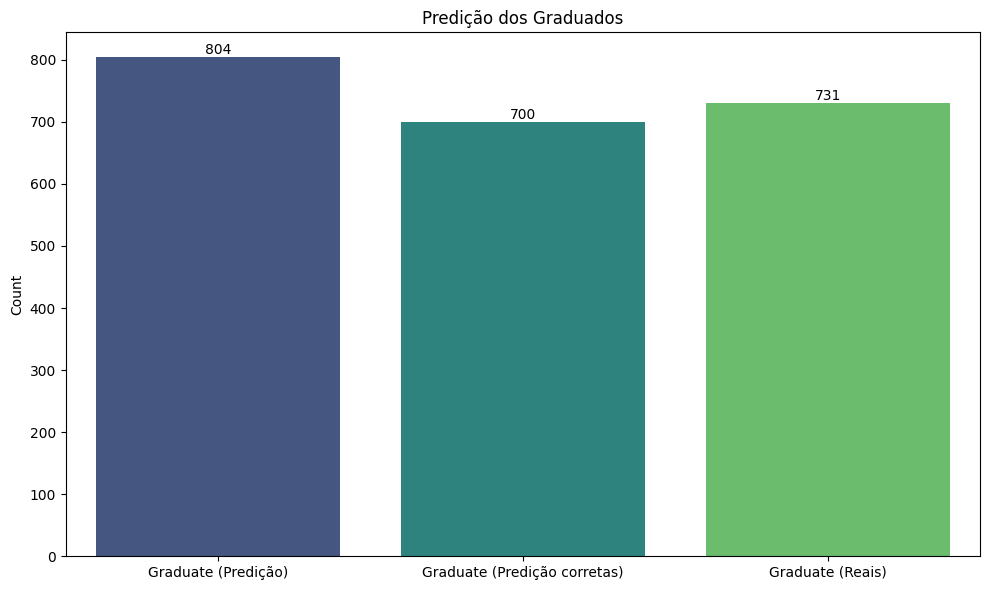

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=graduate_labels, y=graduate_values, hue=graduate_labels, palette="viridis", dodge=False)
for index, value in enumerate(graduate_values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.ylabel('Count')
plt.title('Predição dos Graduados')
plt.tight_layout()
plt.show()

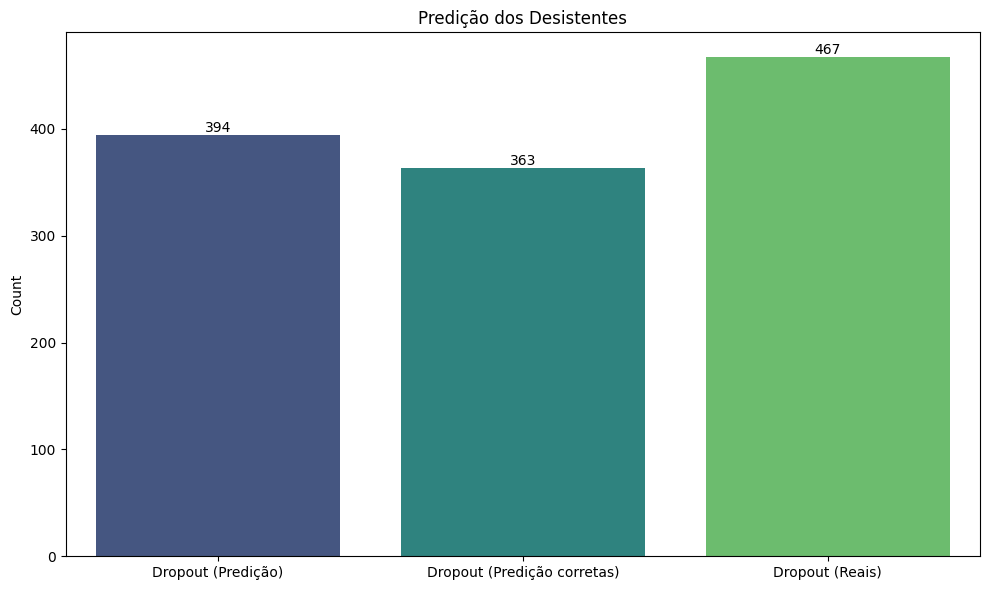

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dropout_labels, y=dropout_values, hue=dropout_labels, palette="viridis", dodge=False)
for index, value in enumerate(dropout_values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.ylabel('Count')
plt.title('Predição dos Desistentes')
plt.tight_layout()
plt.show()

Nesta análise, exploramos a possibilidade de quantificar quantos alunos teriam se formado se não tivessem abandonado a universidade por outros motivos. Para isso, examinamos suas trajetórias durante o primeiro e segundo semestres, levando em conta suas interações com disciplinas, notas obtidas, e a avaliação de admissão. Essa análise permite não apenas prever o desempenho acadêmico dos alunos, mas também entender como fatores como a interação com disciplinas, notas anteriores e a nota de admissão podem influenciar positiva ou negativamente sua permanência na universidade e, consequentemente, sua formatura.

**Número de alunos previstos para se formar:** 804 \
**Número de alunos corretamente previstos para se
formar**: 700 \
**Número total de alunos que se formaram**: 731 \


**Número de alunos previstos para abandonar:** 394 \
**Número de alunos corretamente previstos para abandonar**: 363 \
**Número total de alunos que abandonaram**: 467

Esta análise não só fornece insights sobre os alunos que poderiam ter se formado, mas também destaca a importância de intervenções direcionadas para melhorar a retenção e o sucesso dos alunos ao longo de sua jornada universitária.

#### Análise de Impacto de Variáveis

Regressão Linear Multipla

---
Analisar o impacto de diferentes variáveis independentes (como a educação dos pais, a nacionalidade do aluno, entre outros) no resultado do aluno. Isso pode ajudar a entender quais fatores têm maior peso na determinação do sucesso acadêmico


In [ ]:
rlm_df = filtered_df.copy()

[Documentação statsmodels](https://www.statsmodels.org/stable/index.html)

----
statsmodels: \
Biblioteca Python para análise estatística e modelagem de dados. Foi utilizada para realizar regressão linear múltipla, permitindo modelar a relação entre uma variável dependente e várias variáveis independentes ao mesmo tempo. A função **add_constant** é usada para garantir que o modelo tenha um termo constante para representar o intercepto na regressão.

In [ ]:
X = rlm_df[['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
          'Previous qualification', 'Previous qualification (grade)', 'Nacionalidade', 'Mother\'s qualification',
          'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Displaced',
          'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
          'Age at enrollment']]
y = rlm_df['Status']

X = sm.add_constant(X)

Criação de um modelo de Regressão Linear Ordinária (OLS) usando sm.OLS(y, X), onde y é a variável dependente e X é a matriz de variáveis independentes. O método .fit() ajusta o modelo aos dados, calculando os coeficientes que melhor se ajustam aos dados fornecidos.

In [ ]:
model = sm.OLS(y, X).fit()

Resultados da regressão linear múltipla ajustada ao  conjunto de dados.


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     86.10
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          2.20e-275
Time:                        18:48:23   Log-Likelihood:                -4472.4
No. Observations:                3630   AIC:                             8985.
Df Residuals:                    3610   BIC:                             9109.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

##### Gráficos e Resultados

Calculo dos resíduos do modelo ajustado, que representam a diferença entre os valores observados e os valores previstos pelo modelo de regressão. Em seguida, os resíduos são ordenados, facilitando a análise e identificação de padrões nos erros de previsão.

In [ ]:
residuals = model.resid
residuals_sorted = sorted(residuals)

###### Gráfico QQ

Calculo dos quantis teóricos de uma distribuição normal padronizada para uma série de resíduos classificados em ordem crescente

In [ ]:
norm_quantiles = [stats.norm.ppf(q=(i+1)/(len(residuals_sorted)+1)) for i in range(len(residuals_sorted))]

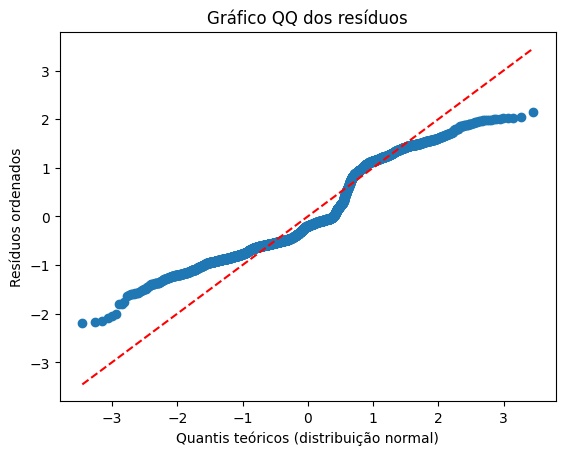

In [ ]:
plt.scatter(norm_quantiles, sorted(residuals))
plt.xlabel('Quantis teóricos (distribuição normal)')
plt.ylabel('Resíduos ordenados')
plt.title('Gráfico QQ dos resíduos')
plt.plot([min(norm_quantiles), max(norm_quantiles)], [min(norm_quantiles), max(norm_quantiles)], color='r', linestyle='--')
plt.show()

Com base na distribuição dos dados, é evidente que a maioria está próxima da linha central, mas uma parcela significativa está fora dessa faixa. Isso sugere que a base de dados não segue uma distribuição normal.

###### Histograma dos Resíduos

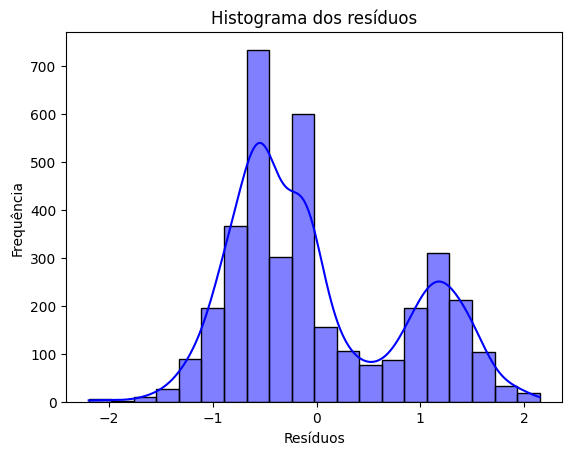

In [ ]:
sns.histplot(residuals_sorted, kde=True, color='blue', bins=20)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos resíduos')
plt.show()

Com base na amostra, observa-se que a distribuição da frequência em comparação ao resíduo não segue inicialmente uma distribuição normal. No entanto, ao longo do tempo, ela parece se ajustar gradualmente e passa a seguir uma distribuição mais normalizada.

### Classificação
Objetivos:
- Identificação de Alunos em Risco de Desistência
- Apoio à Tomada de Decisão

##### Padronização dos Dados

----
[Documentação StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

----
StandardScaler: \
Padronizar as características de um conjunto de dados é fundamental para garantir que elas tenham a mesma escala. O StandardScaler é uma ferramenta eficaz para essa tarefa, transformando os dados de forma que sua distribuição tenha uma média zero e um desvio padrão de um. Essa padronização é essencial em algoritmos sensíveis à escala das características, como aqueles baseados em distâncias, garantindo que todas as características contribuam igualmente para o modelo. Além disso, o StandardScaler ajuda a evitar problemas de convergência em algoritmos de otimização, proporcionando uma convergência mais rápida e estável. Essa normalização dos dados facilita a interpretação dos coeficientes nos modelos e melhora a eficácia geral do processo de aprendizado.

In [ ]:
cdf = df.copy()
cdf = cdf[cdf["Status"] != 0 ]

In [ ]:
X_categorical = cdf.drop('Status', axis=1)
y_categorical = cdf['Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_categorical, y_categorical, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop('GDP', axis=1))
X_test_scaled = scaler.transform(X_test.drop('GDP', axis=1))

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.drop('GDP', axis=1).columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.drop('GDP', axis=1).columns, index=X_test.index)
X_train_scaled['GDP'] = X_train['GDP']
X_test_scaled['GDP'] = X_test['GDP']

#### Identificação de Alunos em Risco de Desistência

Identificar alunos que estão em maior risco de desistir do curso. Com base em atributos como estado civil, desempenho acadêmico inicial e situação eocioeconômica, modelos de classificação podem prever quais alunos têm maior probabilidade de abandonar os estudos.

-----

[Documentação do MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

----
hidden_layer_sizes\
Este parâmetro especifica a arquitetura da rede neural, ou seja, o número de camadas ocultas e o número de neurônios em cada camada oculta.
Por exemplo, (100, 50) significa que há duas camadas ocultas, a primeira com 100 neurônios e a segunda com 50 neurônios.

activation\
Este parâmetro especifica a função de ativação usada em cada neurônio da rede.
> 'relu' se refere à função de ativação Rectified Linear Unit, que é uma escolha comum para redes neurais profundas devido à sua eficácia e simplicidade.

>'tanh' se refere à função de ativação Tangente Hiperbólica, que também é comumente usada em redes neurais.

solver\
Este parâmetro especifica o algoritmo de otimização usado para treinar a rede neural.
'adam' se refere a um método de otimização baseado em gradiente estocástico, que é bastante popular devido à sua eficácia e eficiência.
'sgd' se refere à descida de gradiente estocástica, que é uma abordagem mais simples, mas ainda amplamente utilizada para otimização.

In [ ]:
parameters = {
    'hidden_layer_sizes': [(100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

In [ ]:
model = MLPClassifier(random_state=42)
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100, 50)],
                         'solver': ['adam', 'sgd']})

In [ ]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
predictions = best_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8994490358126722


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       449
           2       0.90      0.82      0.86       277

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



##### Graficos e Resultados

In [ ]:
df_graficos = X_test.copy()
df_graficos['True Labels'] = y_test
df_graficos['Predicted Labels'] = predictions

Valores presente da database referente a descrição do "Martial Status".

In [ ]:
marital_status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}
yes_or_no = {
    1:"Sim",
    0:"Não"
}

Juntar o dicionario com a descrição de cada um com o número que está presente nos dados

In [ ]:
df_graficos['Marital Status'] = df_graficos['Marital Status'].map(marital_status_mapping)
df_graficos['Tuition fees up to date'] = df_graficos['Tuition fees up to date'].map(yes_or_no)

Filtro dos valores dentro do "True Labels" que contem os valores do "Status" do aluno universitario.

In [ ]:
df_dropout = df_graficos[df_graficos['True Labels'] == 2]
df_graduate = df_graficos[df_graficos['True Labels'] == 1]
grouped_dropout = df_dropout.groupby('Marital Status').size().reset_index(name='Number of Students')
grouped_graduate = df_graduate.groupby('Marital Status').size().reset_index(name='Number of Students')

In [ ]:
df_dropout.head(15)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionalidade,Mother's qualification,Father's qualification,...,Interacao_UC_1st_2nd_credited,Interacao_UC_1st_2nd_enrolled,Interacao_UC_1st_2nd_evaluations,Total_UC_Aprovado,Total_UC_Credited,Total_UC_Enrolled,Total_UC_Evaluations,Total_UC_Nota,True Labels,Predicted Labels
3927,single,1,2,9773,1,1,130.0,1,38,37,...,0,36,64,11,0,12,14,13.071429,2,2
524,single,1,1,9556,1,1,180.0,103,5,3,...,0,49,64,4,0,15,16,6.000000,2,2
3198,single,7,1,9254,1,3,110.0,1,19,19,...,0,36,49,0,0,12,13,0.000000,2,2
3592,single,7,1,9670,1,3,110.0,1,27,37,...,42,144,144,15,13,23,23,12.750000,2,2
699,single,43,1,9119,1,1,140.0,1,37,38,...,0,25,100,4,0,10,21,17.166667,2,2
791,single,39,1,9500,1,1,120.0,1,3,3,...,0,36,225,2,0,13,24,5.750000,2,2
4055,single,39,1,9085,1,1,133.1,1,3,19,...,0,36,225,8,0,12,29,12.000000,2,2
980,single,42,1,9119,1,6,120.0,1,35,35,...,4,36,64,6,5,11,16,10.875000,2,2
1452,single,1,1,171,1,1,132.0,1,1,1,...,0,0,0,0,0,0,0,0.000000,2,1
3582,single,39,1,9991,0,1,133.1,1,38,37,...,0,25,0,0,0,10,0,0.000000,2,2


----

###### Desempenho academico com base no Estado Civil

<ipython-input-76-dbd07f9602e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_dropout, x='Marital Status', y='Number of Students', ax=axes[0], palette="viridis", dodge=False)
<ipython-input-76-dbd07f9602e0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_graduate, x='Marital Status', y='Number of Students', palette="viridis", ax=axes[1], dodge=False)


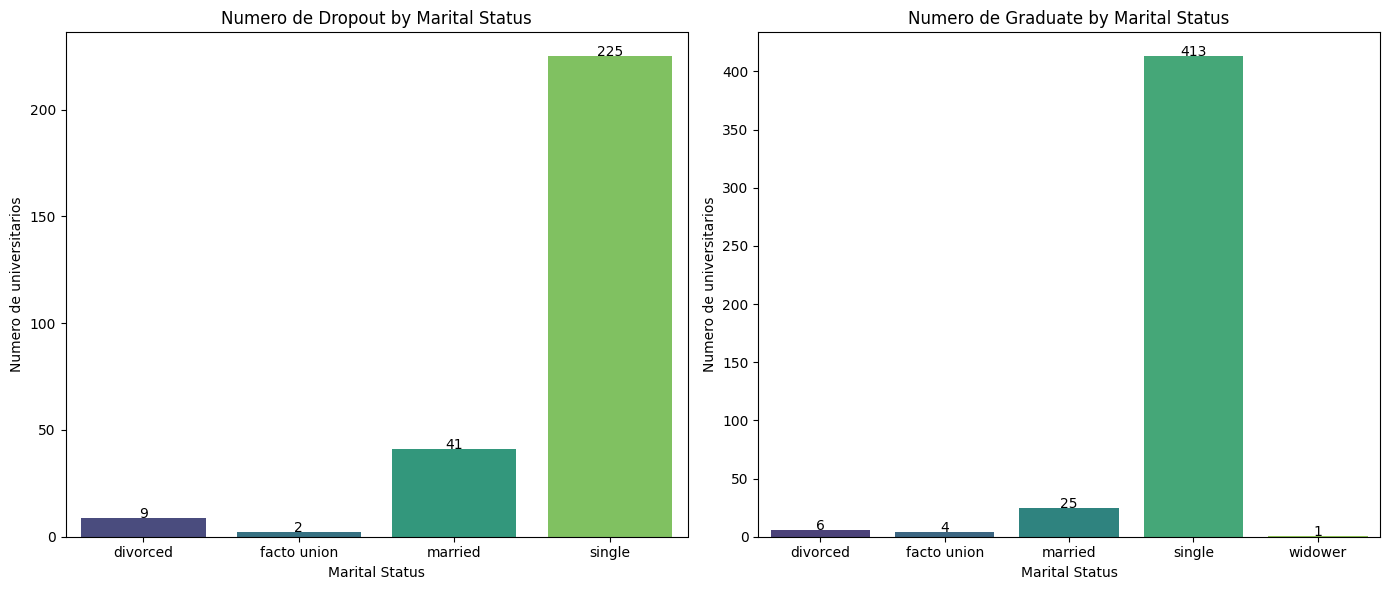

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primeiro Gráfico
sns.barplot(data=grouped_dropout, x='Marital Status', y='Number of Students', ax=axes[0], palette="viridis", dodge=False)
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Numero de universitarios')
axes[0].set_title('Numero de Dropout by Marital Status')
for index, row in grouped_dropout.iterrows():
    axes[0].text(index, row['Number of Students'], row['Number of Students'], color='black', ha="center")

# Segundo Gráfico
sns.barplot(data=grouped_graduate, x='Marital Status', y='Number of Students', palette="viridis", ax=axes[1], dodge=False)
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Numero de universitarios')
axes[1].set_title('Numero de Graduate by Marital Status')
for index, row in grouped_graduate.iterrows():
    axes[1].text(index, row['Number of Students'], row['Number of Students'], color='black', ha="center")

plt.tight_layout()
plt.show()

Gráfico que apresenta o número total de estudantes e sua distribuição por estado civil, buscando analisar qual grupo é mais suscetível a desistir da universidade.

###### Situação socioeconômica

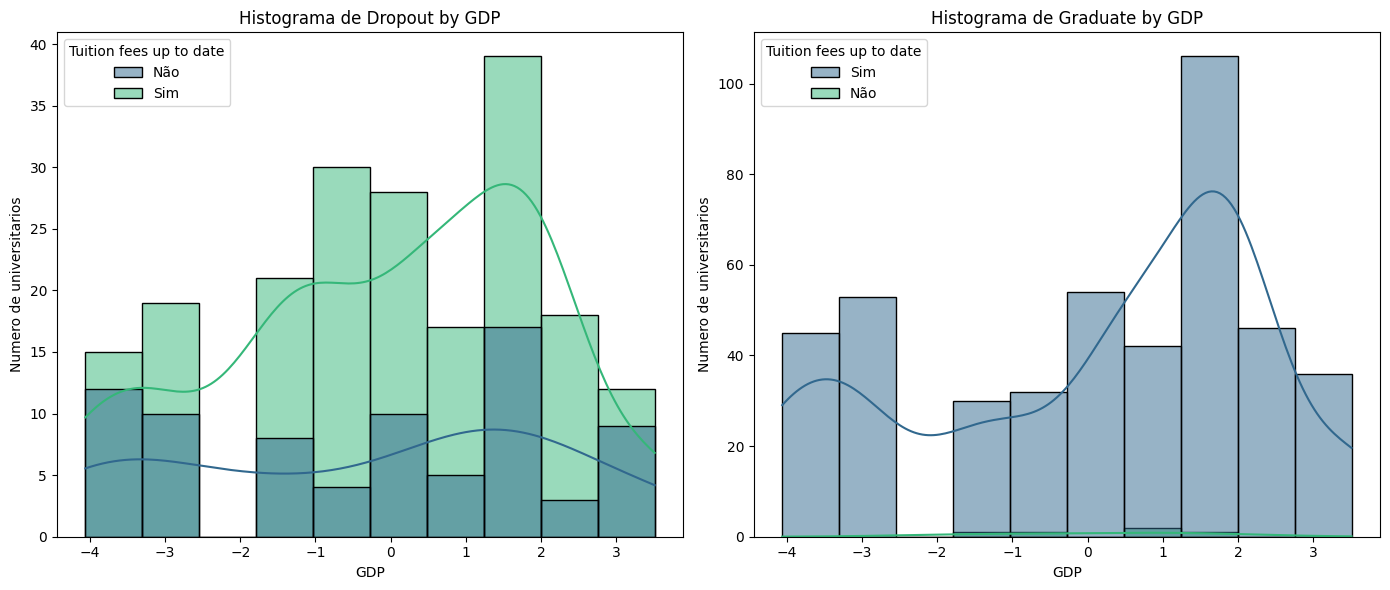

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primeiro gráfico
sns.histplot(data=df_dropout, x='GDP', ax=axes[0], hue='Tuition fees up to date', palette='viridis', multiple='layer', kde=True)
axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Numero de universitarios')
axes[0].set_title('Histograma de Dropout by GDP')

# Segundo gráfico
sns.histplot(data=df_graduate, x='GDP', ax=axes[1], hue='Tuition fees up to date', palette='viridis', multiple='layer', kde=True)
axes[1].set_xlabel('GDP')
axes[1].set_ylabel('Numero de universitarios')
axes[1].set_title('Histograma de Graduate by GDP')

plt.tight_layout()
plt.show()

Gráfico comparativo revela a disparidade no status socioeconômico entre indivíduos e seu impacto no Produto Interno Doméstico (GDP) das pessoas, destacando se houve abandono devido a esta condição. Observa-se que uma parcela significativa da população não conclui o ensino superior devido à falta de recursos financeiros para custear os estudos universitários, levando-os, consequentemente, a desistir dessa etapa educacional.

#### Apoio à Tomada de Decisão
Auxiliar na tomada de decisões estratégicas, fornecendo insights sobre quais grupos de alunos estão em maior risco e quais medidas preventivas podem ser implementadas para melhorar a retenção e o sucesso dos alunos.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
class_names_mapping = {1: "Graduate", 2: "Dropout"}

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_rf_model = grid_search.best_estimator_
# Obtenha o melhor score durante a pesquisa
best_score = grid_search.best_score_
# Obtenha os melhores parâmetros encontrados durante a pesquisa
best_params = grid_search.best_params_

In [ ]:
print("Melhor modelo encontrado:", best_rf_model)
print("Melhor score encontrado:", best_score)
print("Melhores parâmetros encontrados:", best_params)

Melhor modelo encontrado: RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=200,
                       random_state=42)
Melhor score encontrado: 0.8887666923853047
Melhores parâmetros encontrados: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       449
           2       0.90      0.82      0.86       277

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



##### Grafico e Resultado

###### Arvore de decisão


Conversão das class para string

In [ ]:
class_names = [class_names_mapping[class_name] for class_name in best_rf_model.classes_]

In [ ]:
class_names

['Graduate', 'Dropout']

Pegando o primeiro modelo do RandomForestClassifier

In [ ]:
estimator = best_rf_model.estimators_[0]

Descrição das informações dentro da árvore de decisão

----
Feature (Característica): A característica (ou atributo) que está sendo testada no nó. Por exemplo, "idade", "gênero", "renda", etc.

Samples (Amostras): O número total de amostras no nó.

Value (Valor): Uma lista que mostra quantas amostras de cada classe estão presentes no nó. Por exemplo, se houver três classes (0, 1 e 2) e o valor for [10, 20, 5], isso significa que há 10 amostras da classe 0, 20 da classe 1 e 5 da classe 2.

Gini (Índice de Gini): Uma medida de impureza do nó. Quanto menor o índice de Gini, mais puro é o nó, o que significa que as amostras no nó são predominantemente de uma única classe.

Class (Classe): A classe prevista para as amostras no nó, com base na maioria das amostras presentes. Essa informação é exibida apenas nos nós folha da árvore.

-----

Descrição do `plot_tree` \
estimator: O modelo de árvore de decisão que você treinou, como um objeto de classificador de árvore de decisão (DecisionTreeClassifier) ou um objeto de regressor de árvore de decisão (DecisionTreeRegressor).

feature_names: Uma lista dos nomes das características do seu conjunto de dados. Isso é usado para rotular os nós da árvore com o nome das características.

class_names: Uma lista dos nomes das classes em seu problema de classificação. Isso é usado para rotular os nós folha da árvore com o nome das classes.
filled: Um valor booleano que indica se os nós da árvore devem ser preenchidos com cores para representar a classe majoritária naquele nó.

impurity: Um valor booleano que indica se o índice de impureza (como o índice Gini) deve ser exibido em cada nó da árvore.

proportion: Um valor booleano que indica se a proporção de amostras de cada classe no nó deve ser exibida.

precision: O número de casas decimais a serem exibidas nos valores nos nós da árvore, como o índice de impureza. Isso afeta a precisão da exibição dos números.


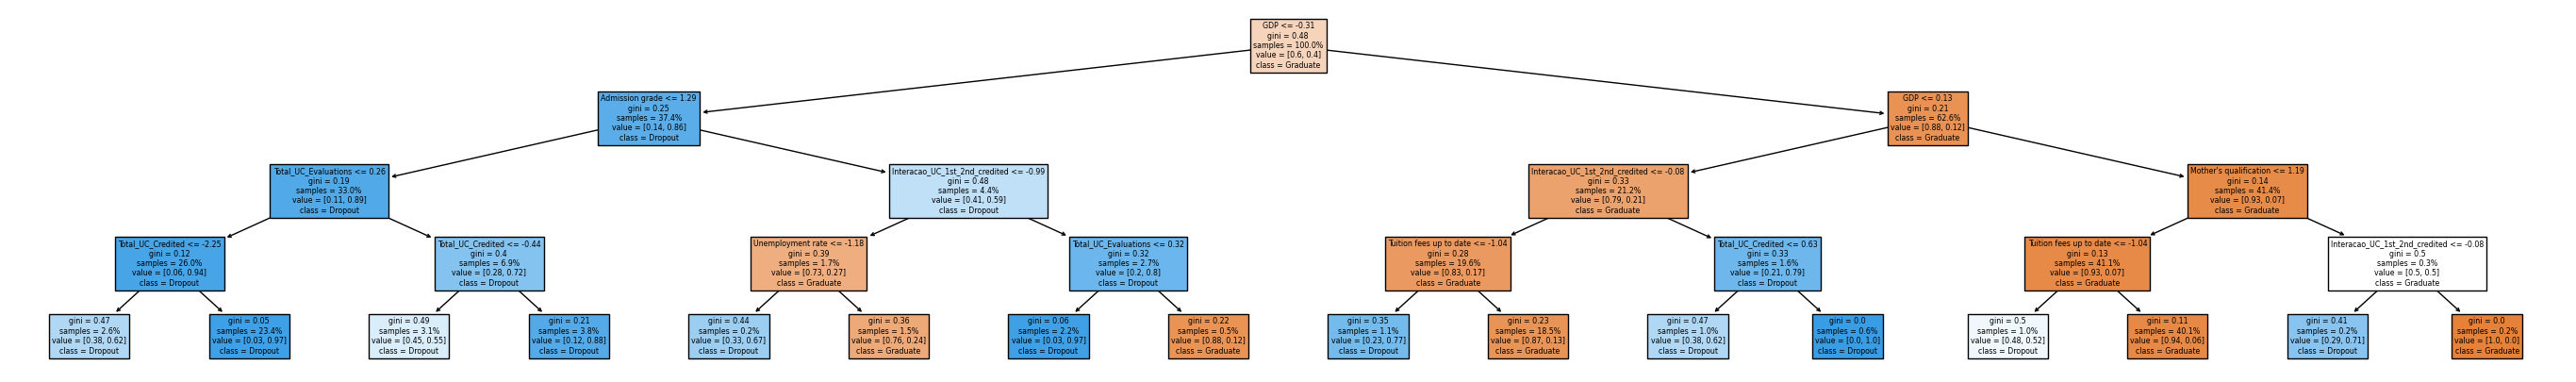

In [ ]:
plt.figure(figsize=(35, 5))
tree.plot_tree(estimator, feature_names=X_categorical.columns, class_names=class_names, filled=True, impurity=True, proportion=True, precision=2)
plt.show()